In [40]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

In [41]:

#Load and review the dataset
data= pd.read_csv("data/demographic_health_data.csv", sep = ",")

data.info()
data.describe()
column_list = list(data.columns)
print(column_list)
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB
['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct', '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop', '30-39', '30-39 y/o % of total pop', '40-49', '40-49 y/o % of total pop', '50-59', '50-59 y/o % of total pop', '60-69', '60-69 y/o % of total pop', '70-79', '70-79 y/o % of total pop', '80+', '80+ y/o % of total pop', 'White-alone pop', '% White-alone', 'Black-alone pop', '% Black-alone', 'Native American/American Indian-alone pop', '% NA/AI-alone', 'Asian-alone pop', '% Asian-alone', 'Hawaiian/Pacific Islander-alone pop', '% Hawaiian/PI-alone', 'Two or more races pop', '% Two or more races', 'POP_ESTIMATE_2018', 'N_POP_CHG_2018', 'GQ_ESTIMATES_2018', 'R_birth_2018', 'R_death_2018', 'R_NATURAL_INC_2018', 'R_INTERNATIONAL_MIG_2018', 'R_DOMESTIC_MIG_2018', 'R_NET_MIG_2018', 'Less 

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [42]:
#Clean up
data = data.drop_duplicates().reset_index(drop = True)
data = data.dropna(how='all')
data.head()
data.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [43]:
#Scaling
from sklearn.preprocessing import StandardScaler

data_types = data.dtypes
numeric_columns = [c for c in list(data_types[data_types != "object"].index) if c != "diabetes_number"]

scaler = StandardScaler()
norm_features = scaler.fit_transform(data[numeric_columns])

# Create a new DataFrame with the scaled numerical variables
data_scal = pd.DataFrame(norm_features, index = data.index, columns = numeric_columns)
data_scal["diabetes_number"] = data["diabetes_number"]
data_scal.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code,diabetes_number
0,-1.940874,-0.145679,-0.142421,0.158006,-0.135556,0.573496,-0.153144,0.027610,-0.139384,0.588469,...,-0.138900,-0.063696,-0.071720,-0.089834,-0.609615,-0.582796,-0.669652,-0.147523,-1.082865,5462
1,-1.940742,0.341296,0.287476,-0.242861,0.320383,-0.193107,0.183774,-0.469965,0.230620,-0.110300,...,0.563986,-0.394103,-0.414900,-0.337677,-0.433549,-0.393279,-0.343373,0.389791,-0.420704,20520
2,-1.940610,-0.237785,-0.239429,-0.419441,-0.246181,-0.439718,-0.225971,0.272104,-0.218759,0.656538,...,-0.219763,2.432709,2.483064,2.317776,1.855312,1.880929,1.777443,-0.204321,0.903618,3870
3,-1.940478,-0.245223,-0.246032,-0.426966,-0.254791,-0.609076,-0.230792,0.396168,-0.220555,1.264959,...,-0.256918,0.376846,0.423984,0.299632,-0.257483,-0.203761,-0.180233,-0.242100,-1.745026,2511
4,-1.940346,-0.138966,-0.135053,0.186249,-0.137140,0.216679,-0.155888,-0.200808,-0.143570,0.088582,...,-0.074198,0.156575,0.195197,0.158008,-0.081417,-0.014244,-0.017093,-0.124105,-1.745026,6017


In [44]:
# Divide the dataset into train and test
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression

X = data_scal.drop(columns=["diabetes_number"])
y = data_scal["diabetes_number"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
train_indices = list(X_train.index)
test_indices = list(X_test.index)
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Testing set shape: X_test={X_test.shape}, y_test={y_test.shape}")

k = int(len(X_train.columns) * 0.3)
selection_model = SelectKBest(score_func = f_regression, k = k)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()

X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()


Training set shape: X_train=(2512, 105), y_train=(2512,)
Testing set shape: X_test=(628, 105), y_test=(628,)


,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,...,Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),Total Population,Population Aged 60+,county_pop2018_18 and older,anycondition_number,Obesity_number,Heart disease_number,COPD_number,CKD_number
0,-0.232556,-0.227731,-0.234284,-0.232951,-0.226353,-0.231316,-0.229599,-0.233425,-0.234680,-0.234420,...,-0.212643,-0.208590,-0.231195,-0.229737,-0.233171,-0.234370,-0.232975,-0.225814,-0.223516,-0.219329
1,-0.158676,-0.178665,-0.180166,-0.188266,-0.175070,-0.161168,-0.134688,-0.105618,-0.119270,-0.091822,...,-0.116680,-0.110850,-0.150293,-0.098866,-0.152859,-0.142645,-0.155304,-0.115392,-0.110080,-0.130962
2,-0.199114,-0.211128,-0.195138,-0.166782,-0.195036,-0.194045,-0.199725,-0.219256,-0.222207,-0.205154,...,-0.192263,-0.217668,-0.197005,-0.216056,-0.195125,-0.193205,-0.201976,-0.216207,-0.193106,-0.206391
3,-0.036595,-0.037734,-0.017077,-0.057986,-0.052252,-0.033158,-0.020228,-0.032603,-0.023876,-0.046224,...,0.062458,-0.107888,-0.036940,-0.030034,-0.039882,-0.003321,0.006163,-0.007276,-0.007077,-0.045054
4,0.090839,0.094680,0.101662,0.056721,0.042392,0.068095,0.101699,0.144664,0.140685,0.166099,...,0.274818,0.194913,0.097767,0.161314,0.088485,0.165555,0.182740,0.197812,0.265603,0.132454


In [45]:
X_test_sel.head()

,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,...,Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),Total Population,Population Aged 60+,county_pop2018_18 and older,anycondition_number,Obesity_number,Heart disease_number,COPD_number,CKD_number
0,-0.285286,-0.285362,-0.294836,-0.269566,-0.258568,-0.268541,-0.289649,-0.312989,-0.316763,-0.286734,...,-0.303292,-0.285225,-0.284324,-0.308211,-0.283698,-0.302439,-0.302292,-0.313819,-0.324038,-0.281172
1,0.496553,0.433072,0.392170,0.544659,0.453677,0.391480,0.499744,0.668639,0.716353,0.476084,...,0.853184,0.424904,0.477184,0.620724,0.517408,0.527360,0.516364,0.537021,0.443806,0.454092
2,-0.260191,-0.255123,-0.265837,-0.246628,-0.234723,-0.240703,-0.264552,-0.289867,-0.289846,-0.290962,...,-0.277451,-0.261868,-0.257294,-0.287868,-0.259943,-0.249299,-0.259877,-0.245286,-0.225107,-0.242229
3,0.039389,0.058341,0.059701,-0.018647,0.003236,0.030594,0.074401,0.091003,0.060721,0.005012,...,0.197267,0.130719,0.036299,0.055281,0.031494,0.035274,0.026108,0.073107,0.136643,0.022352
4,0.364272,0.281232,0.323623,0.525353,0.295990,0.288317,0.298029,0.461297,0.497760,0.351393,...,0.659217,0.305024,0.336581,0.423969,0.390596,0.271127,0.273318,0.365559,0.329669,0.334804


In [46]:
X_train_sel["diabetes_number"] = list(y_train)
X_test_sel["diabetes_number"] = list(y_test)

X_train_sel.to_csv("data/train/clean_train.csv", index = False)
X_test_sel.to_csv("data/test/clean_test.csv", index = False)


In [47]:
data = pd.concat([X_train_sel, X_test_sel])
data.head()

,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,...,Total Specialist Physicians (2019),Total Population,Population Aged 60+,county_pop2018_18 and older,anycondition_number,Obesity_number,Heart disease_number,COPD_number,CKD_number,diabetes_number
0,-0.232556,-0.227731,-0.234284,-0.232951,-0.226353,-0.231316,-0.229599,-0.233425,-0.234680,-0.234420,...,-0.208590,-0.231195,-0.229737,-0.233171,-0.234370,-0.232975,-0.225814,-0.223516,-0.219329,2823
1,-0.158676,-0.178665,-0.180166,-0.188266,-0.175070,-0.161168,-0.134688,-0.105618,-0.119270,-0.091822,...,-0.110850,-0.150293,-0.098866,-0.152859,-0.142645,-0.155304,-0.115392,-0.110080,-0.130962,5416
2,-0.199114,-0.211128,-0.195138,-0.166782,-0.195036,-0.194045,-0.199725,-0.219256,-0.222207,-0.205154,...,-0.217668,-0.197005,-0.216056,-0.195125,-0.193205,-0.201976,-0.216207,-0.193106,-0.206391,3698
3,-0.036595,-0.037734,-0.017077,-0.057986,-0.052252,-0.033158,-0.020228,-0.032603,-0.023876,-0.046224,...,-0.107888,-0.036940,-0.030034,-0.039882,-0.003321,0.006163,-0.007276,-0.007077,-0.045054,7913
4,0.090839,0.094680,0.101662,0.056721,0.042392,0.068095,0.101699,0.144664,0.140685,0.166099,...,0.194913,0.097767,0.161314,0.088485,0.165555,0.182740,0.197812,0.265603,0.132454,12987


In [48]:
#Logistic Regression Model

train_data = pd.read_csv("data/train/clean_train.csv")
test_data = pd.read_csv("data/test/clean_test.csv")

train_data.head()

,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,...,Total Specialist Physicians (2019),Total Population,Population Aged 60+,county_pop2018_18 and older,anycondition_number,Obesity_number,Heart disease_number,COPD_number,CKD_number,diabetes_number
0,-0.232556,-0.227731,-0.234284,-0.232951,-0.226353,-0.231316,-0.229599,-0.233425,-0.234680,-0.234420,...,-0.208590,-0.231195,-0.229737,-0.233171,-0.234370,-0.232975,-0.225814,-0.223516,-0.219329,2823
1,-0.158676,-0.178665,-0.180166,-0.188266,-0.175070,-0.161168,-0.134688,-0.105618,-0.119270,-0.091822,...,-0.110850,-0.150293,-0.098866,-0.152859,-0.142645,-0.155304,-0.115392,-0.110080,-0.130962,5416
2,-0.199114,-0.211128,-0.195138,-0.166782,-0.195036,-0.194045,-0.199725,-0.219256,-0.222207,-0.205154,...,-0.217668,-0.197005,-0.216056,-0.195125,-0.193205,-0.201976,-0.216207,-0.193106,-0.206391,3698
3,-0.036595,-0.037734,-0.017077,-0.057986,-0.052252,-0.033158,-0.020228,-0.032603,-0.023876,-0.046224,...,-0.107888,-0.036940,-0.030034,-0.039882,-0.003321,0.006163,-0.007276,-0.007077,-0.045054,7913
4,0.090839,0.094680,0.101662,0.056721,0.042392,0.068095,0.101699,0.144664,0.140685,0.166099,...,0.194913,0.097767,0.161314,0.088485,0.165555,0.182740,0.197812,0.265603,0.132454,12987


In [49]:
X_train = train_data.drop(["diabetes_number"], axis = 1)
y_train = train_data["diabetes_number"]
X_test = test_data.drop(["diabetes_number"], axis = 1)
y_test = test_data["diabetes_number"]

In [50]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

/workspaces/regularized-linear-regression-projec_ift-tutorial/ifenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
print(f"Intercep (a): {model.intercept_}")
print(f"Coefficients: {model.coef_}")
y_pred = model.predict(X_test)
y_pred

Intercep (a): [-0.30058813 -0.30092209 -0.29925653 ... -2.29404516 -2.08015701
 -1.8450094 ]
Coefficients: [[-0.07074321 -0.06606024 -0.07237766 ... -0.10739057 -0.11794816
  -0.08292715]
 [-0.07088906 -0.06672107 -0.07302803 ... -0.10711966 -0.11795068
  -0.0825897 ]
 [-0.07058535 -0.06606832 -0.07239836 ... -0.10697244 -0.11768078
  -0.08261438]
 ...
 [ 0.18785639  0.13722371  0.09665209 ...  0.1278451   0.21193383
   0.28786234]
 [ 0.23271735  0.40325843  0.26572566 ...  0.17792668  0.04991865
   0.15033614]
 [ 0.20831681  0.1067089   0.12199258 ...  0.09889893  0.09538035
   0.24648829]]


array([   547,  22006,    547,   7922,  21283,    547,    547,    547,
          547,    547,    547,    547,   7922,    547,   7922,    547,
       137266,    547,    547,    547,    547,    547,    547,    547,
        91707,   2687,    547,    547,    547,    547,    547,    547,
          547,    547,   7922,    547,    547,    547,    547,    547,
          547,  21283,    547,    547,   2687,    547,    547,   8456,
          547,    547,  47754,    547,    547,    547,  21283,    547,
        83461,    547,   2687,    547,  22006,    547,    547,  22006,
          547,   2687,    547,    547,    547,  22006,    547,    547,
          547,    547,    547,   2687,  47754,    547,    547,    547,
          547,  10829,  22002,    547,    547,    547,  58354,    547,
          547,  10829,    547,    547,    547,    547,    547,    547,
          547,    547,  21283,    547, 101883,  21283,    547,    547,
          547,    547,    547,    547,  21283,  21283,    547,   8456,
      

In [52]:
#Lets see how accurate are the predictions
from sklearn.metrics import mean_squared_error, r2_score

print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

MSE: 84372000.77070063
R2 Score: 0.7090598776481879


In [53]:
#Model Optimization
from sklearn.linear_model import Lasso

alpha = 1.0
lasso_model = Lasso(alpha = alpha)

lasso_model.fit(X_train, y_train)

# Evaluate the performance
score = lasso_model.score(X_test, y_test)
print("Coefficients:", lasso_model.coef_)
print("R2 score:", score)

Coefficients: [ 1.66963628e+04 -4.23287181e+03 -2.39990499e+03 -6.05336606e+01
 -1.45192155e+03  1.38273580e+04  5.97647517e+03  0.00000000e+00
 -1.57652173e+03  2.85138711e+03 -7.97672412e+03 -3.58183754e+03
  4.60664899e+03  6.95025079e+02 -4.24105825e+03 -5.62684142e+03
  6.29946313e+03 -1.17096129e+03 -4.71892067e+00 -1.25273004e+03
  1.10675830e+03  2.70429991e+02 -2.30245303e+03 -1.69506658e+03
  8.81955387e+03 -2.58397488e+03  1.74783579e+04 -1.83578027e+02
  8.91291619e+03 -8.20126603e+03 -9.27708723e+03]
R2 score: 0.9949633625661745


/workspaces/regularized-linear-regression-projec_ift-tutorial/ifenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.359e+09, tolerance: 2.595e+08
  model = cd_fast.enet_coordinate_descent(


In [54]:
# Get the coefficients after fitting the Lasso model

lasso_coefficients = lasso_model.coef_
lasso_coefficients

array([ 1.66963628e+04, -4.23287181e+03, -2.39990499e+03, -6.05336606e+01,
       -1.45192155e+03,  1.38273580e+04,  5.97647517e+03,  0.00000000e+00,
       -1.57652173e+03,  2.85138711e+03, -7.97672412e+03, -3.58183754e+03,
        4.60664899e+03,  6.95025079e+02, -4.24105825e+03, -5.62684142e+03,
        6.29946313e+03, -1.17096129e+03, -4.71892067e+00, -1.25273004e+03,
        1.10675830e+03,  2.70429991e+02, -2.30245303e+03, -1.69506658e+03,
        8.81955387e+03, -2.58397488e+03,  1.74783579e+04, -1.83578027e+02,
        8.91291619e+03, -8.20126603e+03, -9.27708723e+03])

In [55]:
# Get the names of all features (columns)

feature_names = X_train.columns
removed_features = feature_names[lasso_coefficients == 0]
print("Features removed by Lasso regression:", removed_features)

Features removed by Lasso regression: Index(['60-69'], dtype='object')


In [56]:
# Find the features with coefficients between -4 and 4
filtered_features = feature_names[(lasso_coefficients > -4) & (lasso_coefficients < 4)]
filtered_coefficients = lasso_coefficients[(lasso_coefficients > -4) & (lasso_coefficients < 4)]

# Print the filtered features along with their coefficients
for feature, coef in zip(filtered_features, filtered_coefficients):
    print(f"Feature: {feature}, Coefficient: {coef}")

Feature: 60-69, Coefficient: 0.0


['TOT_POP', '0-9', '19-Oct', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+', 'White-alone pop', 'POP_ESTIMATE_2018', 'Less than a high school diploma 2014-18', 'High school diploma only 2014-18', "Some college or associate's degree 2014-18", "Bachelor's degree or higher 2014-18", 'POVALL_2018', 'Civilian_labor_force_2018', 'Employed_2018', 'Unemployed_2018', 'Total nurse practitioners (2019)', 'Family Medicine/General Practice Primary Care (2019)', 'Total Specialist Physicians (2019)', 'Total Population', 'Population Aged 60+', 'county_pop2018_18 and older', 'anycondition_number', 'Obesity_number', 'Heart disease_number', 'COPD_number', 'CKD_number', 'diabetes_number']
Index([], dtype='object')


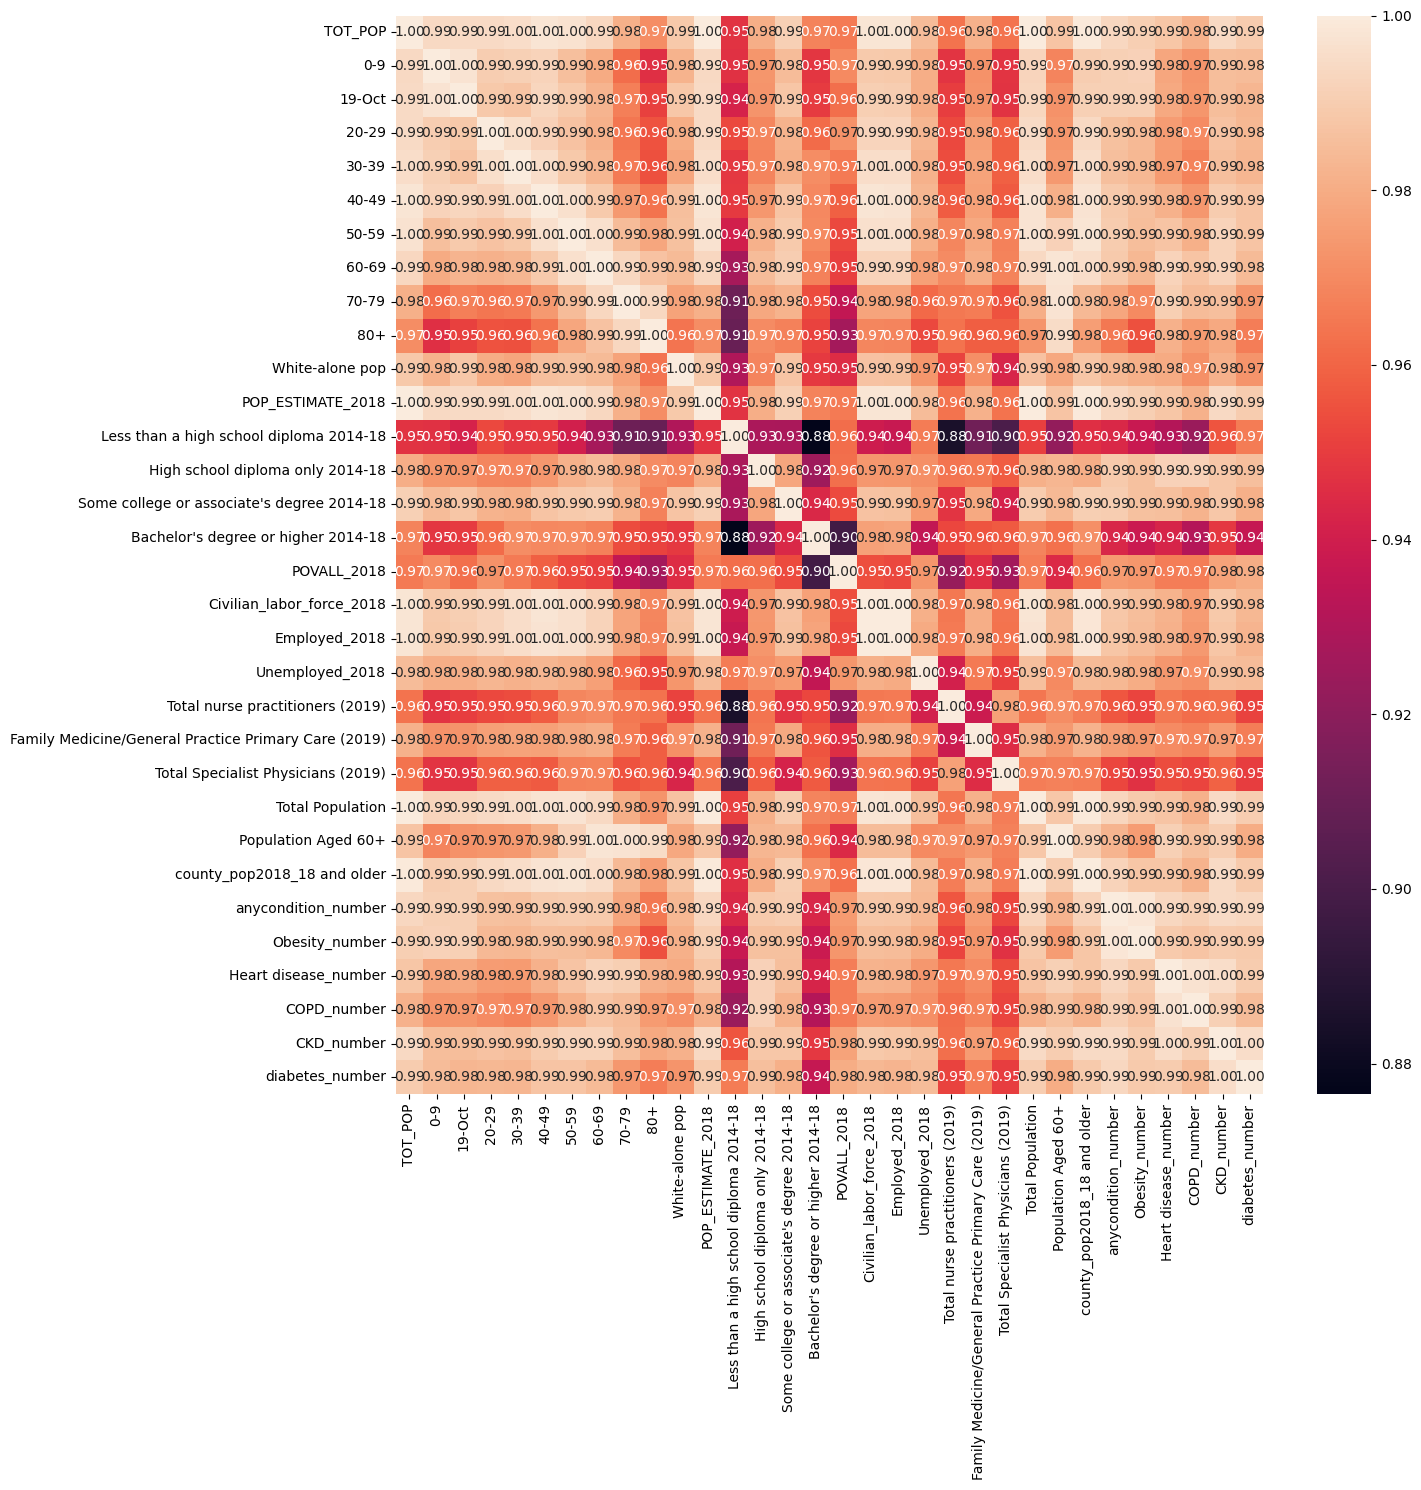

In [62]:
#Analyze - Heat Map after the Lasso to weed out irrelevant parameters


column_list = list(data.columns)
print(column_list)
# Print the non-numeric columns
non_numeric_columns = data.select_dtypes(include=['object']).columns
print(non_numeric_columns)

#Factorize - after the Lasso there is no columns called County_name or State_name
#data["COUNTY_NAME"] = pd.factorize(data["COUNTY_NAME"])[0]
#data["STATE_NAME"] = pd.factorize(data["STATE_NAME"])[0]

corr_matrix = data[column_list].corr()

sfig, axes = plt.subplots(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")

plt.tight_layout()
plt.show()


In [25]:
from pickle import dump

dump(lasso_model, open("models/lasso_alpha-1.0.sav", "wb"))